In [121]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import arff
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [122]:
dataset_path = r"C:\Users\Joel7\OneDrive\Desktop\Techwise ML\Datasets\final-dataset.arff"
with open(dataset_path, 'r') as dataset_file:
    decoder = arff.ArffDecoder()
    data = decoder.decode(dataset_file, encode_nominal=True)

In [123]:
# Define the indices of the selected features
selected_feature_names = ['PKT_DELAY', 'PKT_RATE', 'NODE_NAME_FROM', 'PKT_TYPE', 'NODE_NAME_TO', 'NUMBER_OF_BYTE', 'PKT_AVG_SIZE']
selected_feature_indices = [idx for idx, (name, _) in enumerate(data['attributes']) if name in selected_feature_names]

In [124]:
values = np.array([val[0:-1] for val in data["data"]])
labels = np.array([lab[-1] for lab in data["data"]])

In [125]:
rus = RandomUnderSampler(sampling_strategy='not minority', random_state=0)
values_resampled, labels_resampled = rus.fit_resample(values, labels)

In [126]:
scaler = StandardScaler()
values_scaled = scaler.fit_transform(values_resampled)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(values_scaled, labels_resampled, test_size=0.2, random_state=0)


In [128]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [129]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 75.96%


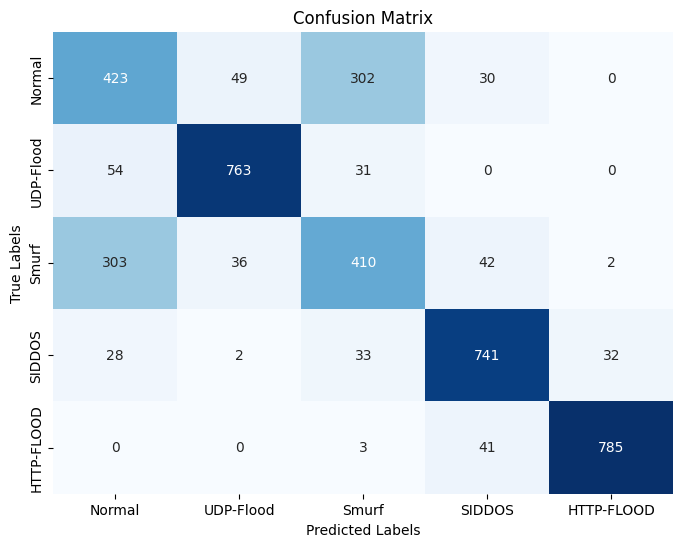

In [130]:
# Define class names
class_names = ["Normal", "UDP-Flood", "Smurf", "SIDDOS", "HTTP-FLOOD"]

# Generate and plot confusion matrix with labeled classes
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [131]:
# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.53      0.52       804
           1       0.90      0.90      0.90       848
           2       0.53      0.52      0.52       793
           3       0.87      0.89      0.88       836
           4       0.96      0.95      0.95       829

    accuracy                           0.76      4110
   macro avg       0.75      0.76      0.75      4110
weighted avg       0.76      0.76      0.76      4110



In [132]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the grid search with the Decision Tree classifier
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                           param_grid=param_grid,
                           cv=5,  # Use 5-fold cross-validation
                           scoring='accuracy',  # Evaluate based on accuracy
                           n_jobs=-1)  # Use all available CPU cores

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict labels for the test set using the best model
y_pred_best = best_model.predict(X_test)

# Calculate accuracy of the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy of the Best Model: {accuracy_best * 100:.2f}%")


Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy of the Best Model: 82.68%


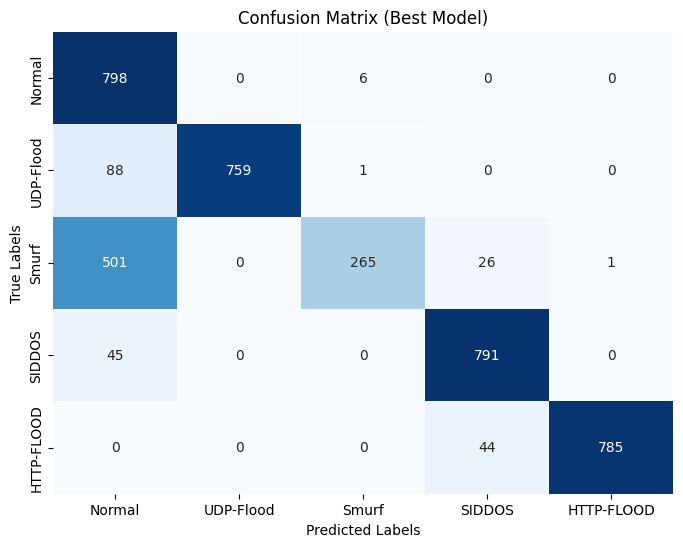

In [133]:
# Predict labels for the test set using the best model
y_pred_best = best_model.predict(X_test)

# Generate confusion matrix for the best model
cm_best = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix with labeled classes
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix (Best Model)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [134]:
# Generate classification report for the best model
class_report_best = classification_report(y_test, y_pred_best, target_names=class_names)

# Print classification report
print("Classification Report (Best Model):\n", class_report_best)


Classification Report (Best Model):
               precision    recall  f1-score   support

      Normal       0.56      0.99      0.71       804
   UDP-Flood       1.00      0.90      0.94       848
       Smurf       0.97      0.33      0.50       793
      SIDDOS       0.92      0.95      0.93       836
  HTTP-FLOOD       1.00      0.95      0.97       829

    accuracy                           0.83      4110
   macro avg       0.89      0.82      0.81      4110
weighted avg       0.89      0.83      0.82      4110



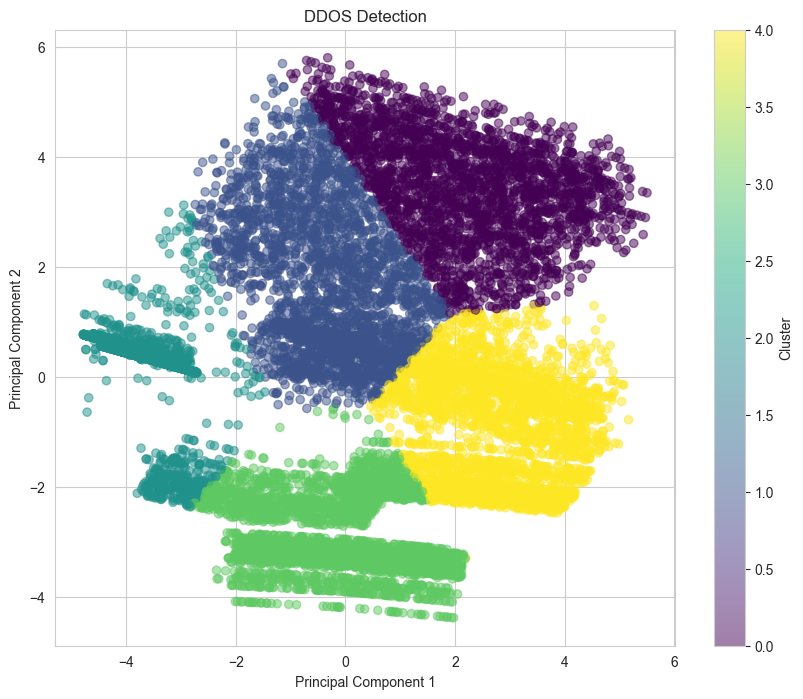

In [163]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Fit KMeans clustering algorithm
kmeans = KMeans(n_clusters=5)  # Adjust the number of clusters as needed
kmeans.fit(X_pca)

# Visualize clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DDOS Detection')
plt.colorbar(label='Cluster')
plt.show()
